In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
data2 = pd.read_csv("merged_data.csv")
# Any results you write to the current directory are saved as output.
data2.head(10)
np.random.seed(seed=42)


Saving merged_data.csv to merged_data (2).csv


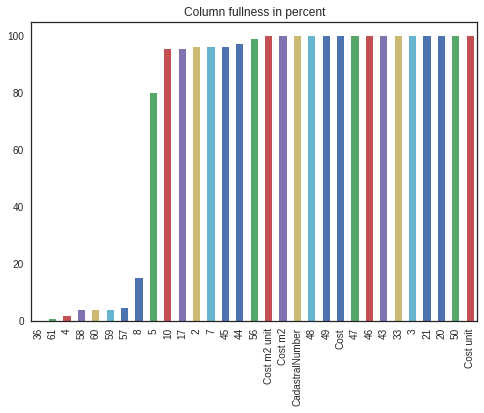

In [24]:
data = data2.copy()
pd.Series(100 - data.isnull().sum()/data.shape[0]*100).sort_values().plot("bar", title="Сolumn fullness in percent")

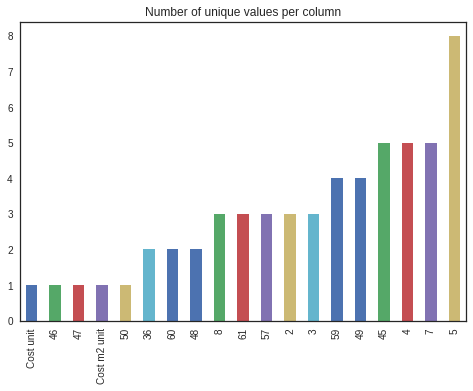

In [25]:
to_plot = {column:len(data[column].unique()) for column in data.columns if len(data[column].unique()) < 15}
pd.Series(to_plot).sort_values().plot("bar", title="Number of unique values per column")

In [26]:
to_drop = ["Cost m2 unit", "Cost unit", "43", "44", "20", "21", "48", "49",  "CadastralNumber"]
print("Before -",data.shape)
for column in data.columns:
    if data[column].isnull().sum() > data.shape[0] * 0.3 or len(data[column].unique()) == 1:
        to_drop.append(column)
data = data.drop(to_drop, axis=1).dropna()
print("After -",data.shape)

Before - (24540, 31)
After - (19594, 11)


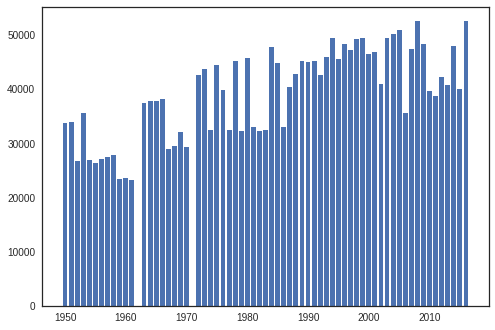

In [27]:
plt.bar(data["33"], data["Cost m2"])
plt.show()

In [28]:
data.head(4)

,10,17,2,3,33,45,5,56,7,Cost m2,Cost
0,3137.450,57.331,1.0,3,1982,102.0,30.0,11160.0,38.0,32280.39,1068480.91
1,1277.343,102.840,2.0,5,1973,104.0,31.0,14624.0,38.0,42853.69,1277039.96
2,1315.543,120.413,2.0,5,2005,102.0,31.0,11155.0,41.0,43745.45,5179461.28
3,3054.712,108.931,2.0,5,1998,102.0,33.0,10933.0,41.0,30787.71,3294284.97


In [29]:
import math
def transformation(value, transform='square'): 
    if transform == 'log':
        return 0 if math.log1p(value) == None else max(0, min(10 ** 3, math.log1p(value))) 
    elif transform == 'sqrt':
        return math.sqrt(value + 3.0 / 8) 
    elif transform == 'square':
        return value ** 2 
    elif transform == 'sin':
        return math.sin(value)
    elif transform == 'cos': 
        return math.cos(value)
data["sum1"] = data["17"] + data["7"]
data["mul1"] = data["3"] * data["2"]
data["mul2"] = data["7"] * data["5"]
columns = data.drop(["Cost m2", "Cost"], axis=1).columns
possible_transformations = ["log", "sqrt", "square", "sin", "cos"]
for column in columns:
    for transform in possible_transformations:
        data[f"{column}_{transform}"] = data[column].apply(transformation,  args=(transform,))
print(data.columns)

Index(['10', '17', '2', '3', '33', '45', '5', '56', '7', 'Cost m2', 'Cost',
       'sum1', 'mul1', 'mul2', '10_log', '10_sqrt', '10_square', '10_sin',
       '10_cos', '17_log', '17_sqrt', '17_square', '17_sin', '17_cos', '2_log',
       '2_sqrt', '2_square', '2_sin', '2_cos', '3_log', '3_sqrt', '3_square',
       '3_sin', '3_cos', '33_log', '33_sqrt', '33_square', '33_sin', '33_cos',
       '45_log', '45_sqrt', '45_square', '45_sin', '45_cos', '5_log', '5_sqrt',
       '5_square', '5_sin', '5_cos', '56_log', '56_sqrt', '56_square',
       '56_sin', '56_cos', '7_log', '7_sqrt', '7_square', '7_sin', '7_cos',
       'sum1_log', 'sum1_sqrt', 'sum1_square', 'sum1_sin', 'sum1_cos',
       'mul1_log', 'mul1_sqrt', 'mul1_square', 'mul1_sin', 'mul1_cos',
       'mul2_log', 'mul2_sqrt', 'mul2_square', 'mul2_sin', 'mul2_cos'],
      dtype='object')


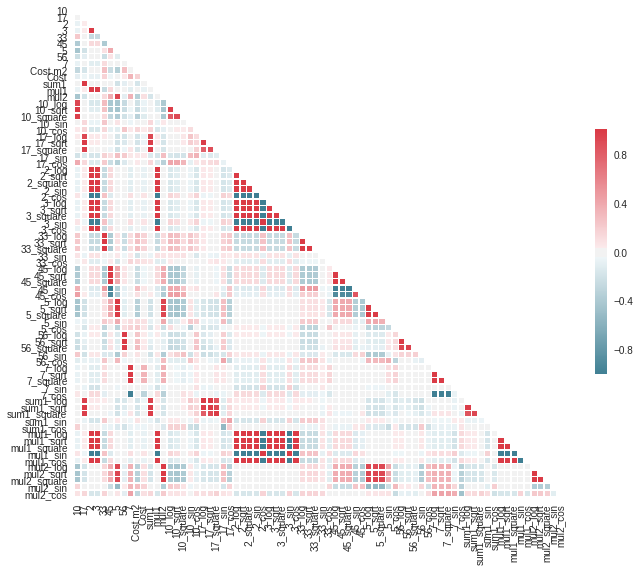

In [30]:
import seaborn as sns
from string import ascii_letters
sns.set(style="white")

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [0]:
def remove_collinear_features(x, threshold):
    y = x['Cost m2']
    x = x.drop(['Cost m2'], axis=1)
    # Считаем матрицу кореляций
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Сравниваем фичу каждую с каждой
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # Если кореляция больше, чем трешхолд
            if val >= threshold:
                drop_cols.append(col.values[0])

    # Удаляем по одному из каждой пары корелируемых
    drops = set(drop_cols)
    x = x.drop(drops, axis=1)
    
    # Возвращаем таргет в таблицу
    x['Cost m2'] = y
    return x

data = remove_collinear_features(data, 0.5)

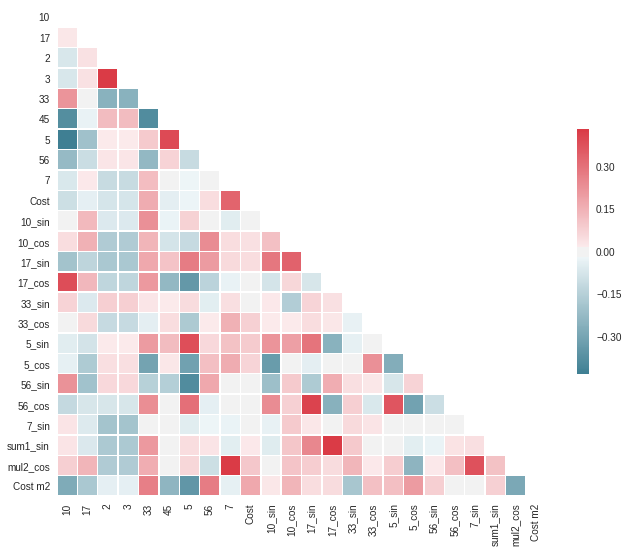

In [32]:
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [33]:
# Onehot encoding
from sklearn.preprocessing import OneHotEncoder
encode_columns = [column for column in data.columns if len(data[column].unique()) < 6]
enc = OneHotEncoder()
for column in encode_columns:
    X = enc.fit_transform(data[column].values.reshape(-1, 1)).toarray()
    OneHot = pd.DataFrame(X, columns = [f"{column}_{i}" for i in range(X.shape[1])])
    data = pd.concat([data, OneHot], axis=1)
    
print('One-hot encoded:', encode_columns)
data = data.drop(encode_columns, axis=1)

One-hot encoded: ['2', '3', '45', '7', '7_sin']


In [0]:
from sklearn.model_selection import train_test_split

Y = data["Cost m2"]
X = data.drop(["Cost m2", "Cost"], axis=1)
X_train, X_test_val, Y_train, Y_test_val = train_test_split(X, Y, test_size=0.1, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_test_val, Y_test_val, test_size=0.5, random_state=42)

In [36]:
! pip install catboost
! pip install ipywidgets

    100% |████████████████████████████████| 59.0MB 522kB/s 


In [39]:
import catboost as cb

cb_model = cb.CatBoostRegressor(
#     task_type="GPU"
)
cb_model.fit(
    X_train, Y_train,
    use_best_model=True,
    eval_set=cb.Pool(X_val, Y_val),
    logging_level="Verbose",  # 'Silent', 'Verbose', 'Info', 'Debug'
    early_stopping_rounds=1,
    plot=True
)
cb_model.save_model("trained_model", format="cbm")


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 33611.7513750	test: 33790.9086322	best: 33790.9086322 (0)	total: 108ms	remaining: 1m 47s
1:	learn: 32620.0230746	test: 32800.0891669	best: 32800.0891669 (1)	total: 153ms	remaining: 1m 16s
2:	learn: 31658.1450889	test: 31836.8298915	best: 31836.8298915 (2)	total: 175ms	remaining: 58.1s
3:	learn: 30746.1608751	test: 30924.7159903	best: 30924.7159903 (3)	total: 185ms	remaining: 46s
4:	learn: 29840.4770278	test: 30016.3303680	best: 30016.3303680 (4)	total: 202ms	remaining: 40.3s
5:	learn: 28983.2667857	test: 29158.9762022	best: 29158.9762022 (5)	total: 212ms	remaining: 35.2s
6:	learn: 28128.3549180	test: 28300.2156505	best: 28300.2156505 (6)	total: 230ms	remaining: 32.6s
7:	learn: 27297.7564389	test: 27465.8653129	best: 27465.8653129 (7)	total: 247ms	remaining: 30.6s
8:	learn: 26493.2906403	test: 26660.9786861	best: 26660.9786861 (8)	total: 265ms	remaining: 29.2s
9:	learn: 25716.4580208	test: 25880.7787782	best: 25880.7787782 (9)	total: 284ms	remaining: 28.1s
10:	learn: 24960.183

In [40]:
cb_model.score(X_test, Y_test)

379.85561991191776

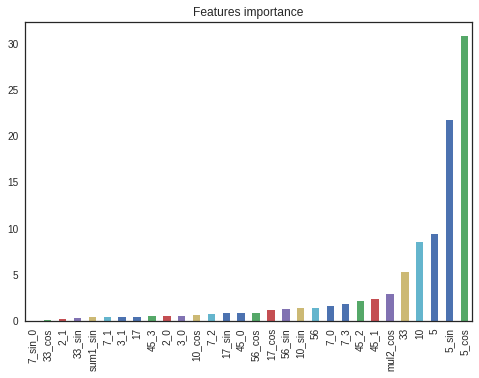

In [44]:
pd.Series(cb_model.feature_importances_, index=X_train.columns).sort_values().plot("bar", title="Features importance")

In [43]:
pd.DataFrame({"prediction": np.round(cb_model.predict(X_test), 2), "test": Y_test}).head(1000)

,prediction,test
15952,34442.14,34560.61
16714,32600.04,32764.26
10408,39097.29,38752.47
379,29792.46,29633.46
11504,42226.30,42500.80
16536,38519.41,38654.76
7276,31683.71,31180.24
1288,32417.74,32435.72
15279,41218.22,41182.75
16156,42944.80,42594.44
